In [1]:
import math
t = lambda v, a: (2*v*math.sin(a))/9.8
tatx = lambda xo, x, v, a: (x - xo)/(v*math.cos(a))
xf = lambda x, v, a: x + v*math.cos(a)*t(v, a)
yf = lambda y, v, a: yft(y, v, a, t(v,a))
yft = lambda y, v, a, t: y + ((v*math.sin(a)*t) - (4.9*(t**2)))
yatx = lambda y, xo, x, v, a: yft(y, v, a, tatx(xo, x, v,a))

In [2]:
import random

In [3]:
def check_score(a, v):
    xo, yo = 0, 0
    x = xf(xo, v, a)
    if x >= 25:
        y = yatx(yo, xo, 25, v, a)
        return 4.3 < y <= 9.14
    else:
        return False

In [4]:
def montecarlo_check_score(iters):
    goods = []
    bads = []
    for _ in range(iters):
        a = math.radians(random.randrange(0, 90))
        v = random.randrange(4, 23) 
        if check_score(a, v):
            goods.append((a, v))
        else:
            bads.append((a, v))
    return {
        True: goods,
        False: bads
    }

In [6]:
montecarlo_check_score(1000)

{True: [(0.9948376736367679, 18),
  (1.1344640137963142, 19),
  (0.6283185307179586, 20),
  (0.6806784082777885, 20),
  (1.2042771838760873, 20),
  (0.7853981633974483, 18),
  (1.1344640137963142, 19),
  (0.6457718232379019, 21),
  (0.9250245035569946, 18),
  (0.4886921905584123, 21),
  (1.0821041362364843, 19),
  (0.5934119456780721, 19),
  (1.0821041362364843, 19),
  (0.6283185307179586, 21),
  (0.7504915783575618, 19),
  (0.9773843811168246, 18),
  (1.064650843716541, 18),
  (0.7504915783575618, 20),
  (0.5585053606381855, 21),
  (0.6108652381980153, 19),
  (1.1868238913561442, 20),
  (0.6632251157578453, 18),
  (0.6806784082777885, 21),
  (0.6981317007977318, 18),
  (0.7853981633974483, 19),
  (0.5934119456780721, 20),
  (0.6108652381980153, 19),
  (0.7155849933176751, 19),
  (1.0297442586766545, 18),
  (0.6981317007977318, 19),
  (0.7504915783575618, 19),
  (0.6806784082777885, 19),
  (0.6632251157578453, 20),
  (0.5061454830783556, 22),
  (0.6632251157578453, 20),
  (0.5759586531

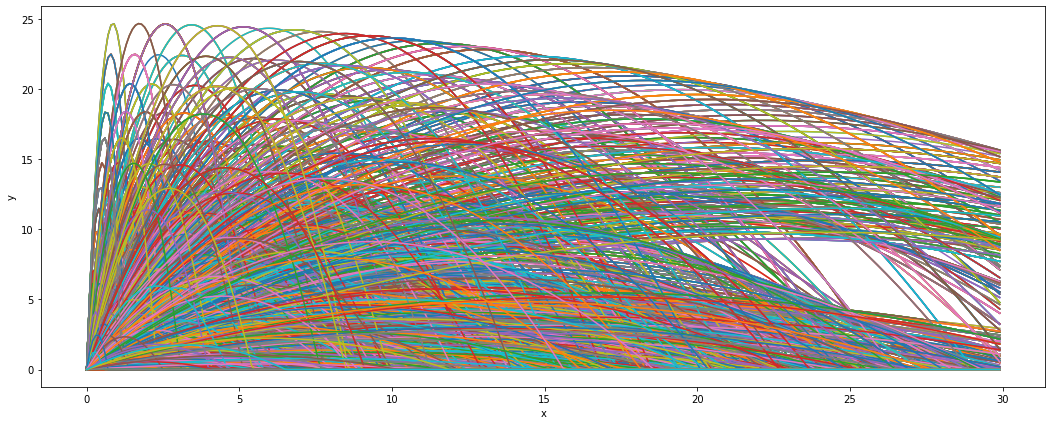

In [11]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,7))

for i in range(10000):
    a = math.radians(random.randrange(0, 90))
    v = random.randrange(4, 23) 
    xo, yo = 0, 0
    
    if check_score(a, v):
        continue

    x = [i for i in np.arange(0.0, 30.0, 0.10)]
    y = [yatx(yo, xo, i, v, a) for i in x]
    y = [i if i > 0 else 0 for i in y]
    data = pd.DataFrame({
        'x': x,
        'y': y
    })
    o = sb.lineplot(x='x', y='y', data=data)

In [5]:
res = montecarlo_check_score(10000)

In [6]:
angles = [i[0] for i in res[True]]
speed = [i[1] for i in res[True]]

In [7]:
most_common_angle = max(set(angles), key = angles.count) 
most_common_speed = max(set(speed), key = speed.count) 

In [8]:
angle_avg = sum(angles)/len(angles)
speed_avg = sum(speed)/len(speed)

In [9]:
min_angle = min(angles)
min_speed = min(speed)

In [10]:
max_angle = max(angles)
max_speed = max(speed)

In [11]:
print(f'Angulo optimo (grados): min={math.degrees(min_angle)} max={math.degrees(max_angle)} avg={math.degrees(angle_avg)}')

Angulo optimo (grados): min=26.0 max=73.0 avg=43.12016293279024


In [14]:
print(f'Velocidad optimo (m/s): min={min_speed} max={max_speed} avg={speed_avg}')

Velocidad optimo (m/s): min=18 max=22 avg=19.65580448065173


True
True
True


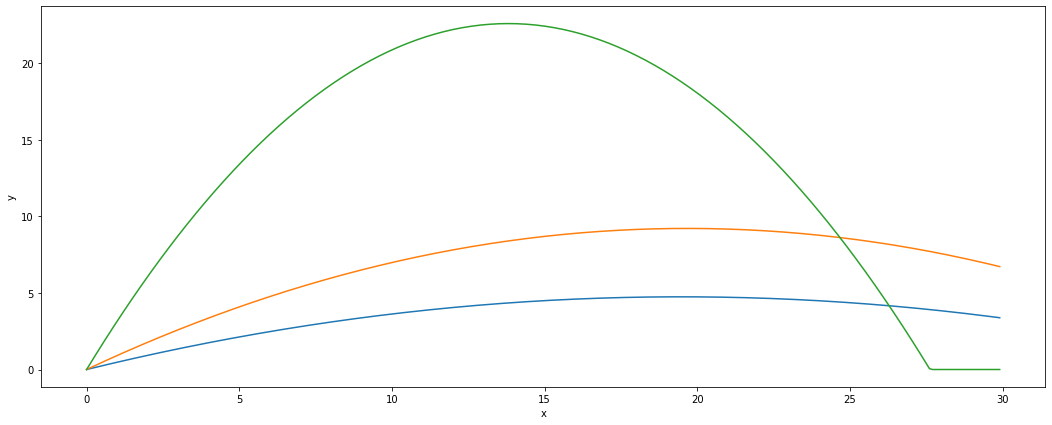

In [13]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18,7))

data = [(min_angle, max_speed), (angle_avg, speed_avg), (max_angle, max_speed)]

for (a, v) in data: 
    xo, yo = 0, 0
    
    print(check_score(a, v))

    x = [i for i in np.arange(0.0, 30.0, 0.10)]
    y = [yatx(yo, xo, i, v, a) for i in x]
    y = [i if i > 0 else 0 for i in y]
    data = pd.DataFrame({
        'x': x,
        'y': y
    })
    o = sb.lineplot(x='x', y='y', data=data)